0.04.05
5.0
1.014.015
14.0
2.024.025
23.0
2.034.035
33.0
3.044.045
42.0
4.053.055
50.0
5.063.065
59.0
6.073.075
68.0
6.083.085
78.0
7.093.095
87.0


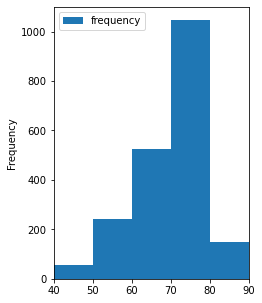

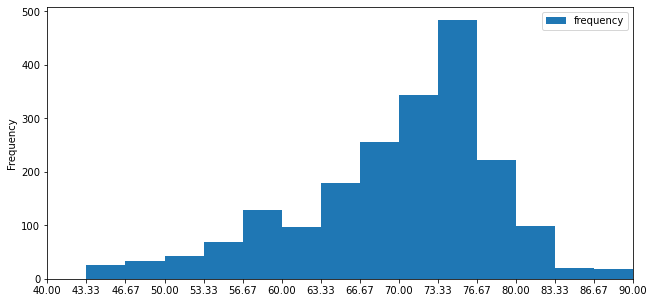

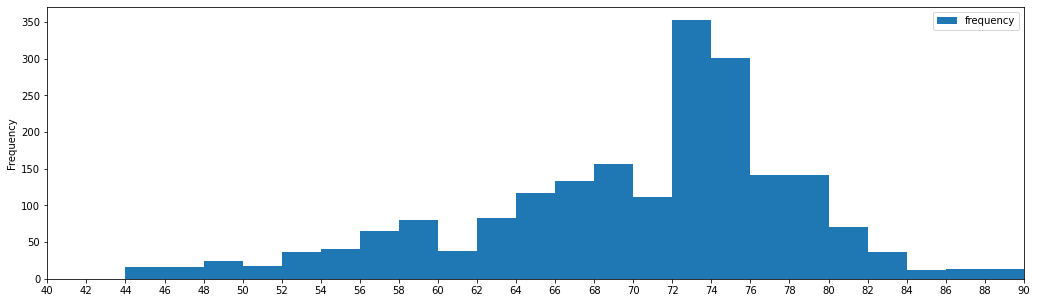

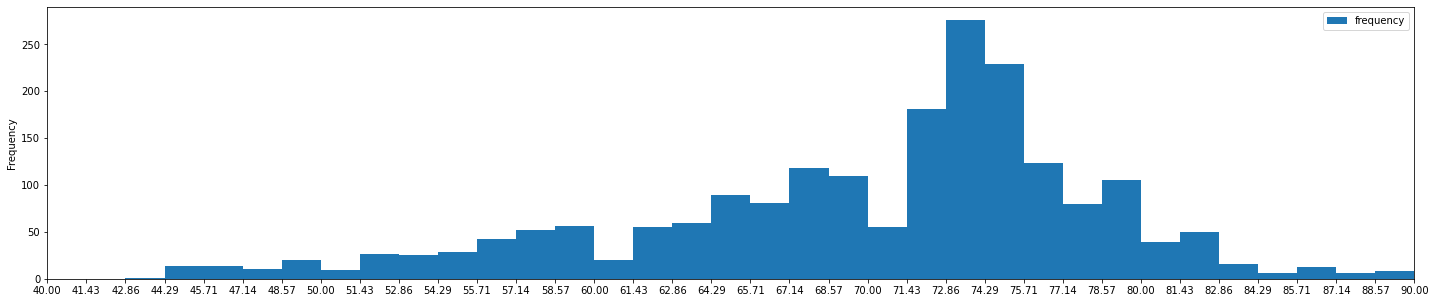

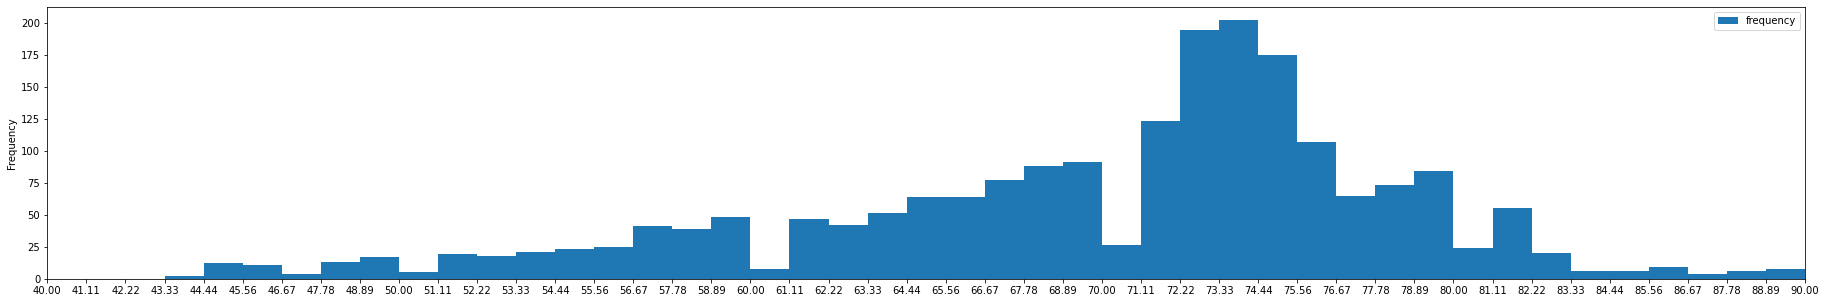

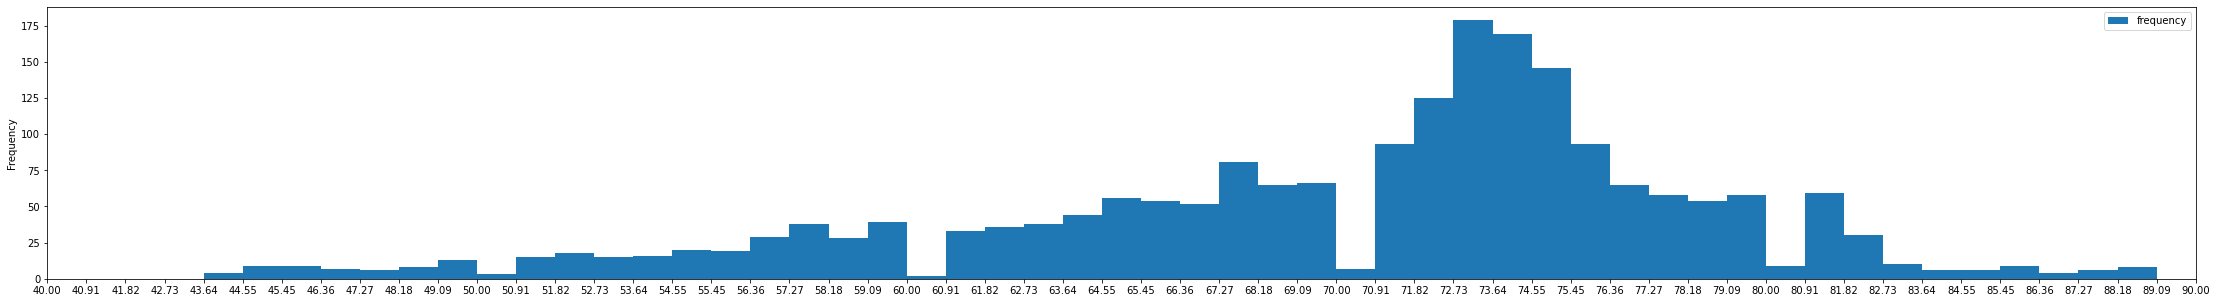

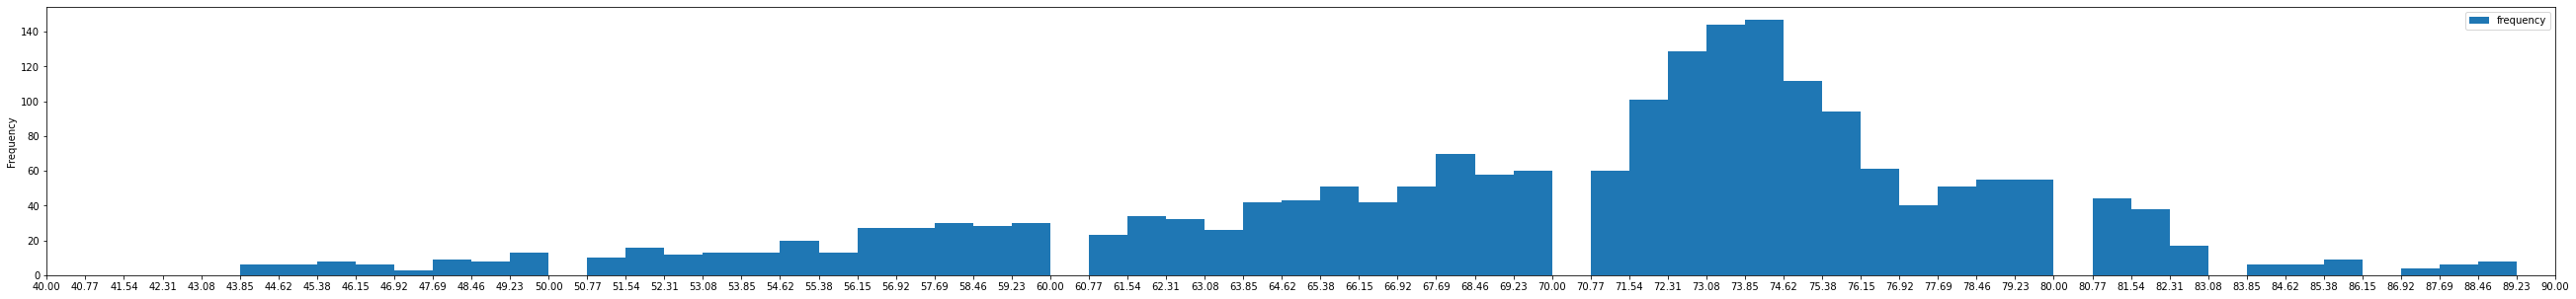

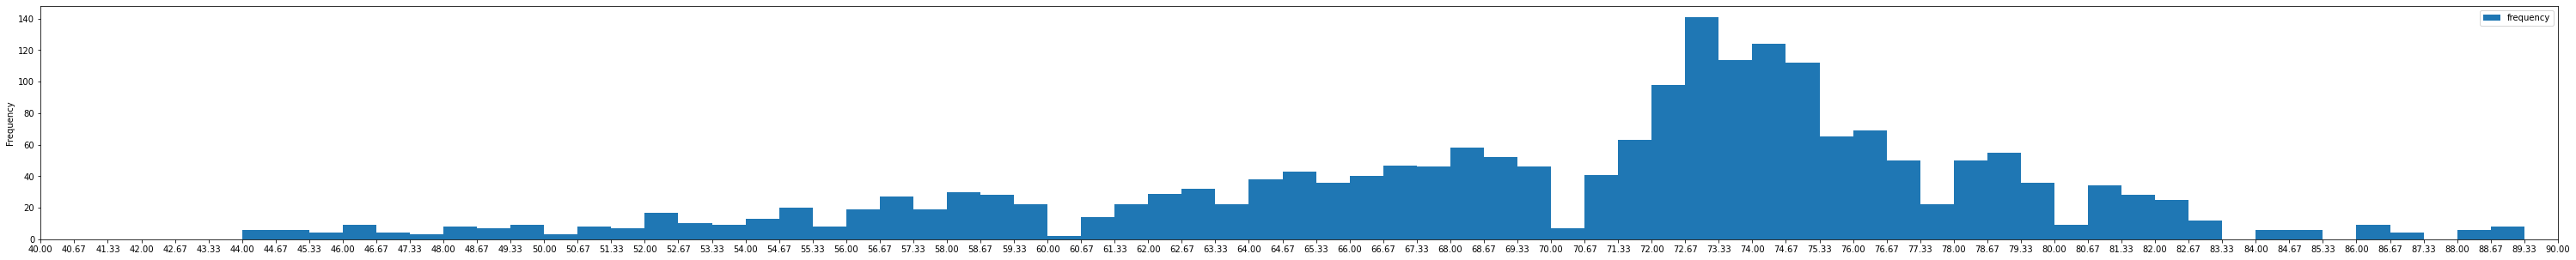

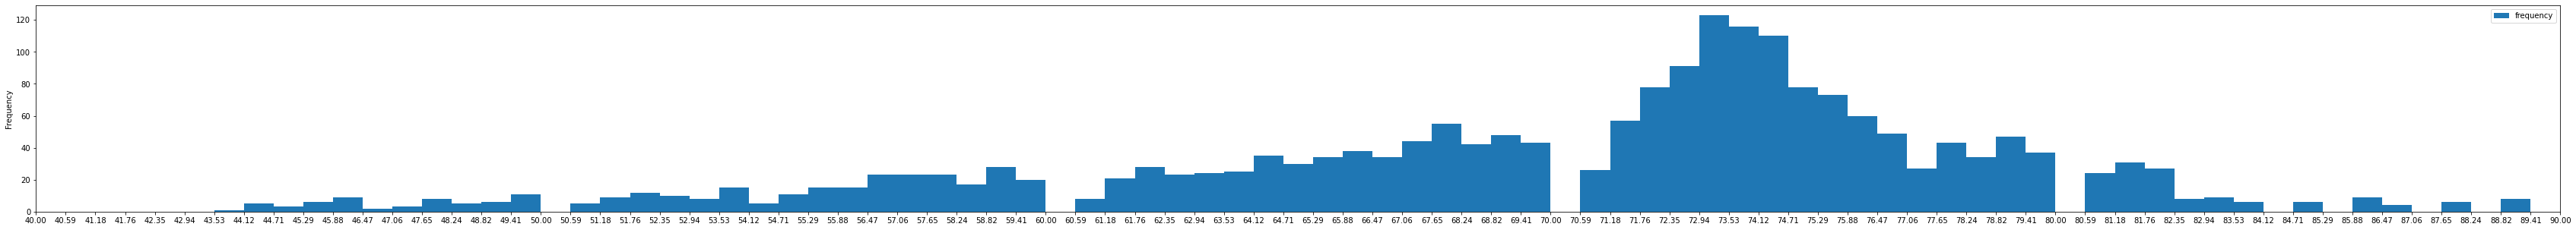

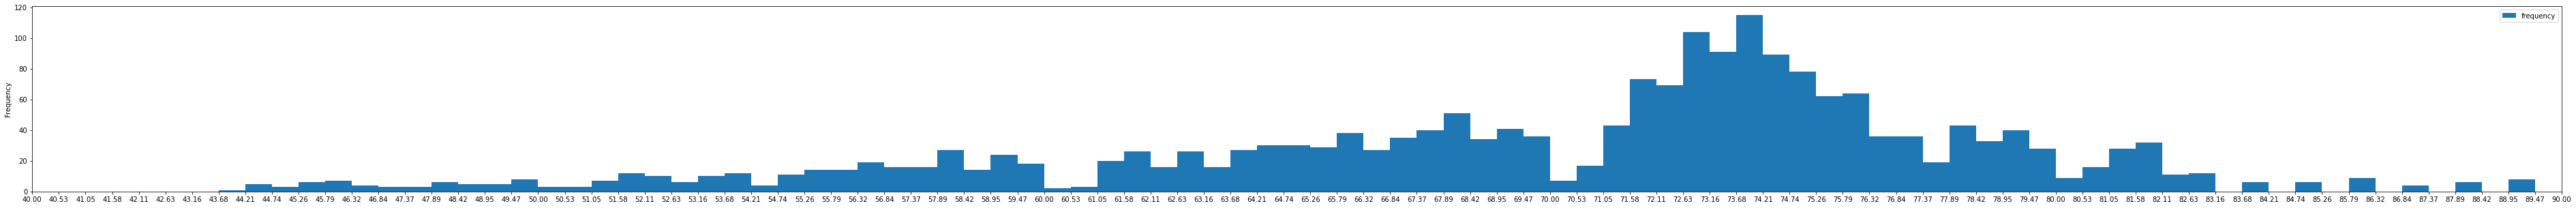

In [13]:
import numpy as np
from sklearn.metrics import jaccard_score
import pandas as pd

class Preprocessor():
    def preprocess(self, file):
        entries = file.readlines()
        self.matrix = np.empty((0,len(entries[0].split(",")) - 2))
        self.countries = np.empty(0)
        self.attributes = np.asarray(entries[0].split(",")[2:])

        for i in range(1, len(entries)):
            line_el = entries[i].split(",")
            arr = np.empty(0)
            for j in range(len(line_el)):
                if j == 0:
                    self.countries = np.append(self.countries, line_el[j])
                elif j >= 2:
                    if j == 2:
                        if line_el[j] == "Developing":
                            arr = np.append(arr, 0)
                        elif line_el[j] == "Developed":
                            arr = np.append(arr, 1)
                        else:
                            line_el[j] == None
                    else:
                        try:
                            arr = np.append(arr, float(line_el[j]))
                        except:
                            arr = np.append(arr, None)
                    
            self.matrix = np.append(self.matrix, [arr], axis = 0)

    def getMatrix(self):
        return self.matrix
    
    def getAttributes(self):
        return self.attributes
    
    def getCountries(self):
        return self.countries
    
    def getColumn(self, attribute = None):
        if attribute == None:
            return None
        col = 0
        for i in range(np.shape(self.attributes)[0]):
            if self.attributes[i] == attribute:
                col = i
                break
        return self.matrix[...,col]

    def isFilled(self, row):
        ln = np.shape(row)[0]
        for i in range(ln):
            if row[i] == None:
                return False
        
        return True

    def cleanUnfilled(self):
        nMatrix = np.empty((0,np.shape(self.matrix)[1]))
        nCountries = np.empty(0)

        for i in range(np.shape(self.matrix)[0]):
            if self.isFilled(self.matrix[i]):
                nMatrix = np.append(nMatrix, [self.matrix[i]], axis = 0)
                nCountries = np.append(nCountries, self.countries[i])
        
        self.matrix = nMatrix

def split_class(values, low, high, k = 2):
    if low > np.amin(values) or high < np.amax(values):
        print(str(np.amin(values)) + " " + str(np.amax(values)))
        return None
    new_values = np.empty(0)
    step = (high - low) / k

    for x in values:
        val = (x - low) // step
        if val == k:
            val -= 1
        new_values = np.append(new_values, val)
    
    return new_values


def main():
    f = open("led.csv", "r")

    preprocessor = Preprocessor()
    preprocessor.preprocess(f)
    preprocessor.cleanUnfilled()
    vals = preprocessor.getColumn("Lifeexpectancy")

    for i in range(5,96, 10):
        low = 40
        high = 90
        step = (high - low) / i
        values = split_class(vals, low, high, k=i)
        print(str(np.amin(values)) + str(np.amax(values)) + str(i))
        bin_val = np.amax(values) - np.amin(values) + 1
        n_low = low + (np.amin(values) * step)
        n_high = low + ((np.amax(values) + 1) * step)
        print(bin_val)
        n_step = (n_high - n_low) / (bin_val - 1)
        values = (n_low) + ((values - np.amin(values)) * n_step)
        df = pd.DataFrame(values, columns=['frequency'])
        ax = df.plot.hist(bins = int(bin_val), xlim = (low, high), xticks = [(low + step * x) for x in range(i + 1)], figsize = (.7 * i, 5))

main()